16


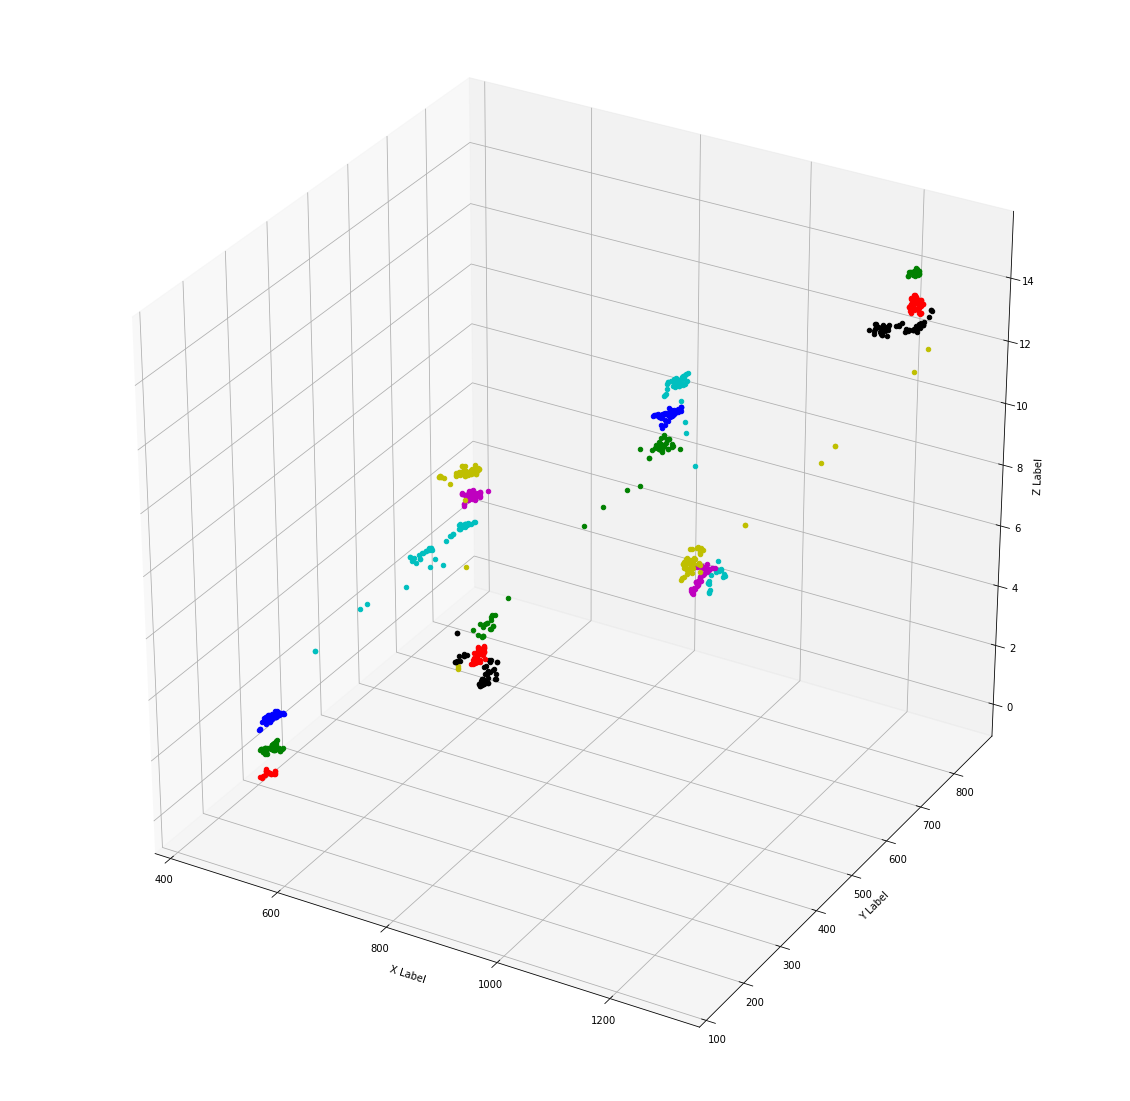

In [36]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

minPtsA = 2
minPtsB = 2

dataname='ev20-3-10.csv'
img = plt.imread("ev2020c.png")

df = pd.read_csv(dataname,sep=",", dtype={'x':float,'y':float,'timecount':float},header=None,names=["no","userid","timestamp","timecount","x","y"])

temp_tc =df['timecount']
#df['timecount']=df['timecount'].multiply(other = 30) 
df['timecount']=df['timecount']-df['timecount'][0]
df = df.drop(columns=['no', 'userid', 'timestamp'])

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
current_t = -1
cmap = ['r','g','b','c','m','y','k']
asc = -1
count=0
for index, row in df.iterrows():
    if current_t!=row['timecount']:
        current_t=row['timecount']
        asc=(asc+1)%7
        count+=1
    ax.scatter(row['x'], row['y'], row['timecount'], c=cmap[asc], marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
print(count)


16


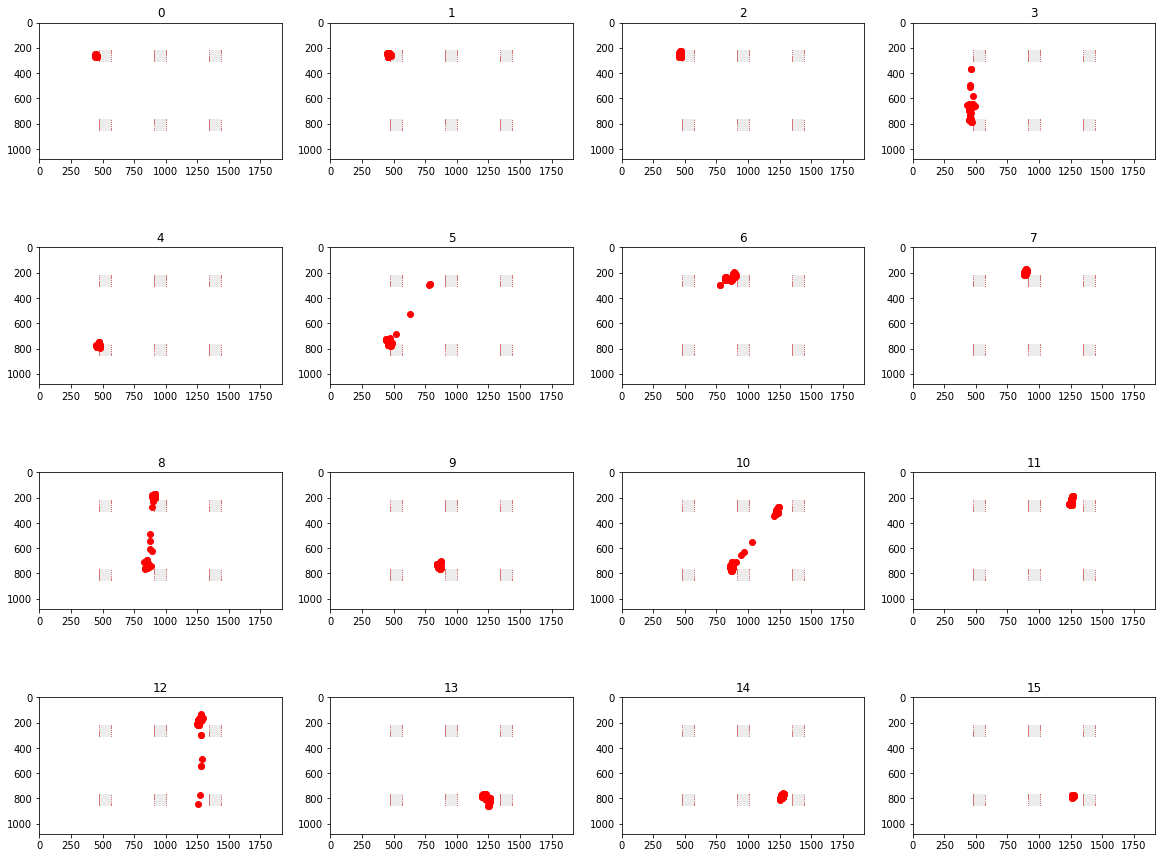

In [37]:
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)

fig = plt.figure(figsize=(20, 20))

ycount = round(count/5)+1
sublist = []
subcount=0
print(count)
raw_data_time_cl = []

for i in range(1,count+1):
    sublist.append(fig.add_subplot(5,ycount,i))
    sublist[i-1].title.set_text(i-1)
    sublist[i-1].set_xlim([0, 1920])
    sublist[i-1].set_ylim([1080, 0])
    sublist[i-1].imshow(img, extent=[0, 1920, 1080, 0])
        
for index, row in df.iterrows():
    if current_t!=row['timecount']:
        current_t=row['timecount']
        asc=(asc+1)%7
        subcount+=1
        raw_data_time_cl.append([])
    raw_data_time_cl[subcount-1].append([row['x'], row['y']])
    sublist[subcount-1].scatter(row['x'], row['y'], c='r', marker='o')

862
25.431489199668054
11.061657872123753
[[   0.        442.976171  248.702389]
 [   0.        446.074249  252.786875]
 [   0.        441.93152   265.932631]
 ...
 [  15.       1274.879975  780.78147 ]
 [  15.       1274.879975  780.78147 ]
 [  15.       1273.326809  779.520718]]


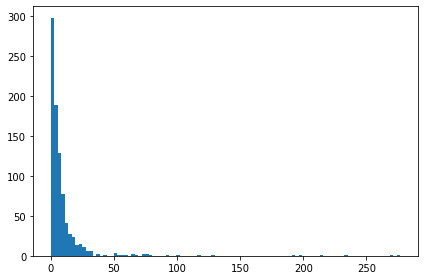

In [38]:
import math
Cnt = 0
sumdist=0
dist_data = np.array([])
for i in raw_data_time_cl:
    dist=0
    if len(i)>1:    
        for j in range(0,len(i)-1):
            dist=math.sqrt(pow(i[j][0]-i[j+1][0],2)+pow(i[j][1]-i[j+1][1],2))
            sumdist+=dist/2
            dist_data = np.append(dist_data, dist)
            Cnt+=1



fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(dist_data, bins=100)

lebun=0.20
hibun=0.80

dist_data = np.sort(dist_data)
eps = dist_data[round(dist_data.size*hibun)]+1.5*(dist_data[round(dist_data.size*hibun)]-dist_data[round(dist_data.size*lebun)])
other = dist_data[round(dist_data.size*hibun)]

print(dist_data.size)
print(eps)
print(other)
print(df.values)


Counter({4: 144, 12: 142, 0: 138, 6: 138, 8: 134, 9: 131, 3: 26, -1: 10, 5: 5, 1: 2, 2: 2, 7: 2, 10: 2, 11: 2})
13


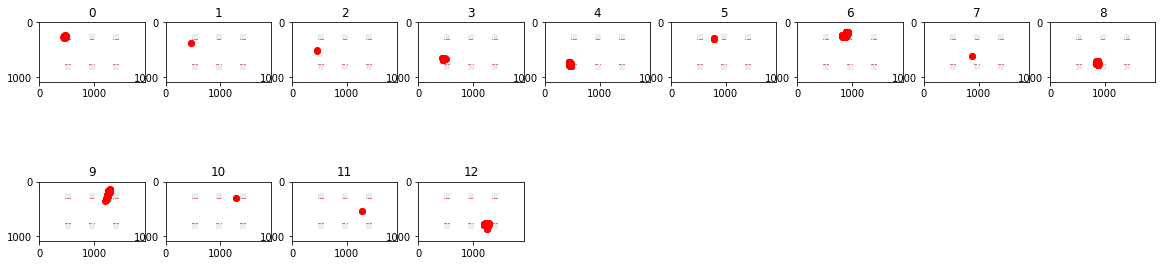

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
data = np.random.rand(500,3)

db = DBSCAN(eps=eps, min_samples=minPtsA).fit(df.values)
labels = db.labels_


from collections import Counter
print(Counter(labels))

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)


clusters = [df.values[labels == i] for i in range(n_clusters_)]


fig = plt.figure(figsize=(20, 20))
fig_sub = []
fig_sub_count=0

for i in range(1,len(clusters)+1):
    fig_sub.append(fig.add_subplot(7,9,i))
    fig_sub[i-1].title.set_text(i-1)
    fig_sub[i-1].set_xlim([0, 1920])
    fig_sub[i-1].set_ylim([1080, 0])
    fig_sub[i-1].imshow(img, extent=[0, 1920, 1080, 0])

for i in range(1,len(clusters)+1):
    fig_sub_count+=1
    for j in clusters[i-1]:
        fig_sub[fig_sub_count-1].scatter(j[1], j[2], c='r', marker='o')



Counter({4: 144, 12: 142, 0: 138, 6: 137, 8: 134, 9: 131, 3: 26, -1: 11, 5: 5, 1: 2, 2: 2, 7: 2, 10: 2, 11: 2})


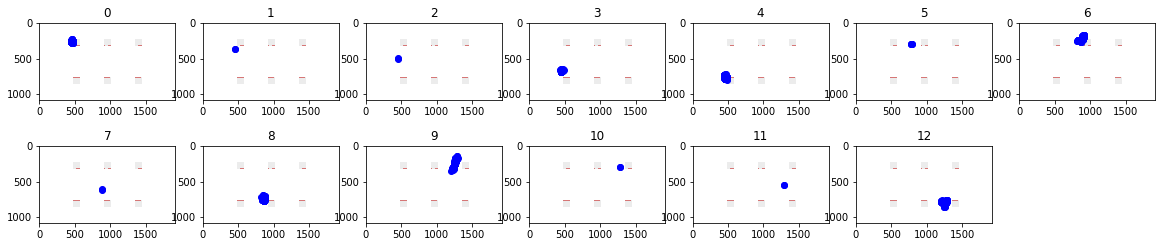

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
df['timecount']=df['timecount'].multiply(other = other) 

db = DBSCAN(eps=eps, min_samples=minPtsB).fit(df.values)
labels = db.labels_




from collections import Counter
print(Counter(labels))

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

#print(n_clusters_)


clusters = [df.values[labels == i] for i in range(n_clusters_)]


fig = plt.figure(figsize=(20, 20))
fig_sub = []
fig_sub_count=0

for i in range(1,len(clusters)+1):
    fig_sub.append(fig.add_subplot(9,7,i))
    fig_sub[i-1].title.set_text(i-1)
    fig_sub[i-1].set_xlim([0, 1920])
    fig_sub[i-1].set_ylim([1080, 0])
    fig_sub[i-1].imshow(img, extent=[0, 1920, 1080, 0])

savecsv=[]
counts=[]
for i in range(1,len(clusters)+1):
    fig_sub_count+=1
    tmpres=[]
    count=0
    for j in clusters[i-1]:
        fig_sub[fig_sub_count-1].scatter(j[1], j[2], c='b', marker='o')
        tmpres.append(str(int(j[0]/other))+"/"+str(int(j[1]))+"/"+str(int(j[2])))
        count+=1
    tmpres="/".join(tmpres)
    savecsv.append(tmpres)
    counts.append(count)
#print(savecsv)

In [34]:
range(1,len(clusters)+1)


range(1, 25)

In [35]:
maxd = max(counts)
print(maxd)
for i in range(len(counts)):
    counts[i]=counts[i]/maxd
d = {'data': savecsv, 'counts': counts}
csv_df = pd.DataFrame(d)
print(csv_df)
csv_df.to_csv("data/DBSCAN_5_5/clusted_"+dataname,header=False,index=False)

144
                                                 data    counts
0   0/442/248/0/446/252/0/441/265/0/442/266/0/442/...  0.958333
1                                 3/461/369/3/461/369  0.013889
2                                 3/453/497/3/454/512  0.013889
3                                           3/480/579  0.006944
4   3/495/658/3/479/645/3/473/667/3/452/645/3/450/...  0.180556
5   3/457/717/3/455/741/3/454/733/3/454/735/3/454/...  1.000000
6                                           5/517/688  0.006944
7                                           5/633/526  0.006944
8   5/782/294/5/787/287/5/785/290/6/779/299/6/779/299  0.034722
9   6/822/235/6/827/238/6/822/232/6/822/233/6/823/...  0.951389
10                                          8/891/272  0.006944
11                                          8/879/486  0.006944
12                                          8/873/545  0.006944
13                                8/889/619/8/878/602  0.013889
14  8/855/693/8/855/693/8/847/715/8/

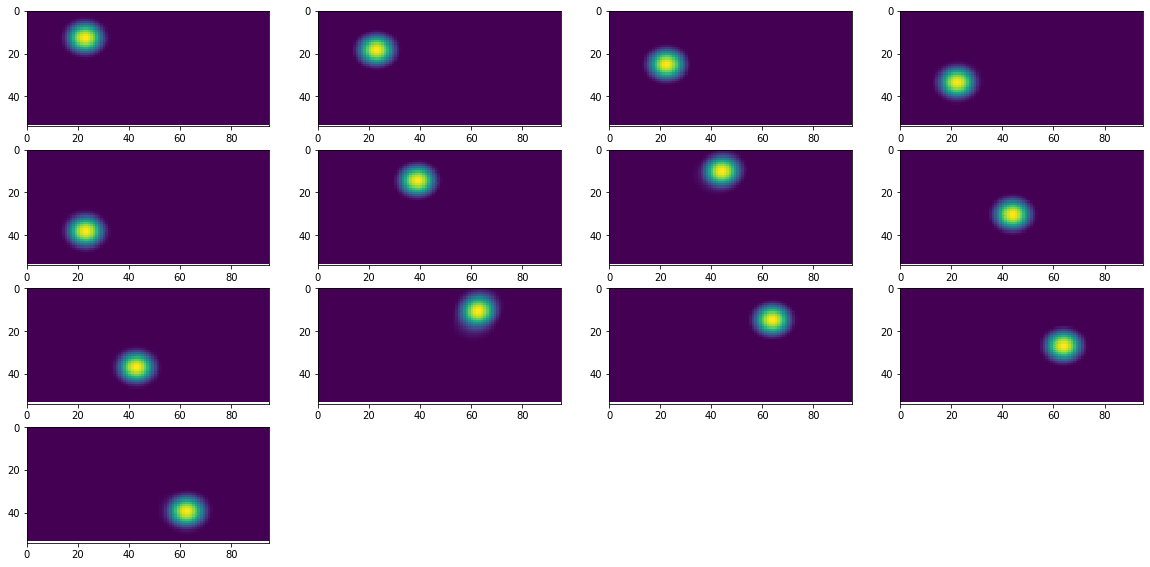

In [14]:

import math

fig = plt.figure(figsize=(20, 20))
ax=[]
for i in range(1,n_clusters_+1):    
    ax.append(fig.add_subplot(8,4,i))
    
    
for q in range(1,n_clusters_+1):    
    ax[q-1].set_ylim([54, 0])
    x=clusters[q-1][:,1]/20
    y=clusters[q-1][:,2]/20

    grid_size=1
    h=10

    x_grid=np.arange(0,96)
    y_grid=np.arange(0,54)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)

    def kde_quartic(d,h):
        dn=d/h
        P=(15/16)*(1-dn**2)**2
        return P

    #PROCESSING
    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #CALCULATE DISTANCE
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
                if d<=h:
                    p=kde_quartic(d,h)
                else:
                    p=0
                kde_value_list.append(p)
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)

    intensity=np.array(intensity_list)
    
    ax[q-1].pcolormesh(x_mesh,y_mesh,intensity)